# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
pip install palmerpenguins

In [3]:
# Code Here
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
penguins_dummified = pd.get_dummies(penguins, drop_first=True)
penguins_dummified.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
3,NaN,NaN,NaN,NaN,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from palmerpenguins import load_penguins

penguins_dummified=penguins_dummified.dropna()

X = penguins_dummified.drop(columns=[ "species_Chinstrap", "species_Gentoo"])
y = penguins_dummified[[ "species_Chinstrap", "species_Gentoo"]].idxmax(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# kNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("kNN Classification Report:\n", classification_report(y_test, y_pred_knn))


kNN Classification Report:
                    precision    recall  f1-score   support

species_Chinstrap       0.96      0.98      0.97        44
   species_Gentoo       0.96      0.92      0.94        25

         accuracy                           0.96        69
        macro avg       0.96      0.95      0.95        69
     weighted avg       0.96      0.96      0.96        69



For k=3:

High accuracy (96%): The model predicts species correctly most of the time.
Precision, Recall, F1-score are strong across both species, meaning the model is balanced in making predictions without significant bias toward one species.

Confusion Matrix (from earlier): Shows very few misclassifications between species.



In [20]:
# for k=5:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("kNN Classification Report:\n", classification_report(y_test, y_pred_knn))


kNN Classification Report:
                    precision    recall  f1-score   support

species_Chinstrap       0.96      0.98      0.97        44
   species_Gentoo       0.96      0.92      0.94        25

         accuracy                           0.96        69
        macro avg       0.96      0.95      0.95        69
     weighted avg       0.96      0.96      0.96        69



# No difference observed

In [22]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("kNN Classification Report:\n", classification_report(y_test, y_pred_knn))

kNN Classification Report:
                    precision    recall  f1-score   support

species_Chinstrap       0.93      0.98      0.96        44
   species_Gentoo       0.96      0.88      0.92        25

         accuracy                           0.94        69
        macro avg       0.95      0.93      0.94        69
     weighted avg       0.94      0.94      0.94        69



(for k=15, there is slight drop in numbers of f1 score and recall)

In [13]:
# Decision Tree model
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
                    precision    recall  f1-score   support

species_Chinstrap       1.00      1.00      1.00        44
   species_Gentoo       1.00      1.00      1.00        25

         accuracy                           1.00        69
        macro avg       1.00      1.00      1.00        69
     weighted avg       1.00      1.00      1.00        69



In [21]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
                    precision    recall  f1-score   support

species_Chinstrap       1.00      1.00      1.00        44
   species_Gentoo       1.00      1.00      1.00        25

         accuracy                           1.00        69
        macro avg       1.00      1.00      1.00        69
     weighted avg       1.00      1.00      1.00        69



In [23]:
#depth=15
tree = DecisionTreeClassifier(max_depth=15)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
                    precision    recall  f1-score   support

species_Chinstrap       1.00      1.00      1.00        44
   species_Gentoo       1.00      1.00      1.00        25

         accuracy                           1.00        69
        macro avg       1.00      1.00      1.00        69
     weighted avg       1.00      1.00      1.00        69



Accuracy: 100%. This means the decision tree perfectly classifies all species in the test set.

Precision, Recall, F1-score: All are perfect (1.00). The model is effectively overfitting to the training data because of its high interpretability and small dataset.

For depth=5, the results are similar

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

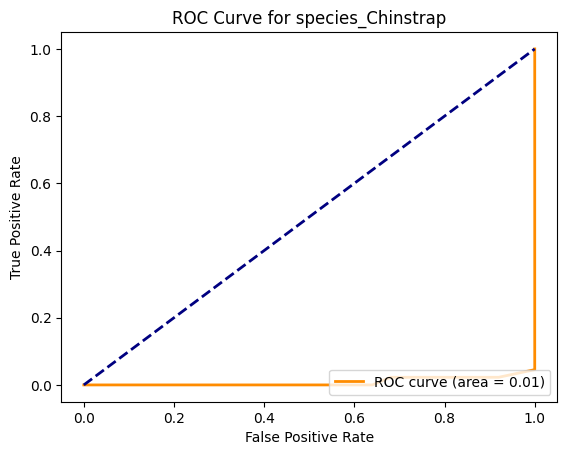

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for "species_Chinstrap"
y_test_bin = label_binarize(y_test, classes=["species_Adelie", "species_Chinstrap", "species_Gentoo"])[:, 1]
y_score_knn = knn.predict_proba(X_test)[:, 1]  # Use probabilities for the second class (Chinstrap)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin, y_score_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for species_Chinstrap")
plt.legend(loc="lower right")
plt.show()


In [27]:
#(Used chatgpt for the above code as I was constantly getting an error using plotnine)